## Lesson #7: Intro to Classification - K-Nearest Neighbors 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, neighbors, metrics
from sklearn.model_selection import KFold, GridSearchCV


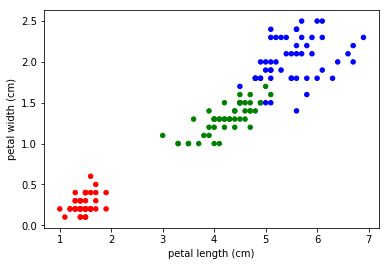

In [30]:
# Load iris dataset from the datasets package
iris = datasets.load_iris()

# Create a pandas dataframe from iris. Grab the column names 
# from iris.feature_names, and target from iris.target:
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

# Define the colormap dictionary (dictionaries are a great way of 
# replacing values in a Series with`.apply()`)
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])

# Plot the petal length against width using the target's label as the color to see patterns
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget);

In [31]:
# Check the summary statistics
irisdf.describe().T.style

In [32]:
# Build a function that classifies each data point according 
# to criteria you set for one feature: my_classifier

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

In [33]:
# Create a Pandas Series of predictions using your classifier: predictions
irisdf['predictions'] = predictions


# Calculate accuracy # we predicted correctly/ sample size 
float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.6666666666666666

In [34]:
len(irisdf[irisdf.target == irisdf.predictions])

100

### More specific solution

For the class, this solution is as simple it really needs to be in order to get a very good prediction score. But: Why, or when, does this fail? What attributes make this a great data set for learning classification algorithms? What makes it not as great?

In [35]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 5:
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

float(len(irisdf[irisdf["target"] == irisdf["predictions"]])) / len(irisdf)

0.9466666666666667

### Using distance: KNN implementation

In [36]:
outcome = irisdf["target"]
outcome.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [37]:
features = irisdf[["petal length (cm)", "petal width (cm)"]]
features.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

In [38]:
# Load iris again if you have altered the original, otherwise, you don't have to reload:
iris = datasets.load_iris()

# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(features, outcome)
print(knn.predict(features))
print(iris.target)
print()
print(knn.score(features, outcome))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

0.96


### Do we see a change in performance with using the distance weight?

In [39]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(features, outcome)
print(knn.predict(features))
print(iris.target)
print()
print(knn.score(features, outcome))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

0.9933333333333333


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive; note that the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [64]:
# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
k = range(2, 100)
params = {'n_neighbors': k }
gs = GridSearchCV(
    
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
)
gs.fit(iris.data, iris.target)
gs.cv_results_
# print(gs.best_score_) 
# print(gs.cv_results_['params'][gs.best_index_])

/Users/amyroberts/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amyroberts/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/amyroberts/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/amyroberts/anaconda3/lib/python3.7/site-packages/sklearn/uti

{'mean_fit_time': array([0.0005517 , 0.0007983 , 0.00028944, 0.00027768, 0.00027045,
        0.00028038, 0.00029365, 0.00040785, 0.00030104, 0.00029167,
        0.00034897, 0.00055504, 0.00028801, 0.00029993, 0.00037591,
        0.00035024, 0.00028888, 0.00035874, 0.00028102, 0.00034865,
        0.00027053, 0.00029731, 0.00027609, 0.00029111, 0.00025876,
        0.00027204, 0.00027331, 0.00025463, 0.00032194, 0.00027553,
        0.0002563 , 0.00026162, 0.0003407 , 0.00026186, 0.00026631,
        0.00031439, 0.00026027, 0.00027315, 0.00025336, 0.00025988,
        0.00026774, 0.00026766, 0.00027593, 0.00027879, 0.00030669,
        0.00027935, 0.00026162, 0.00023619, 0.00021958, 0.00019836,
        0.00021664, 0.00019709, 0.00023699, 0.00020321, 0.00019415,
        0.00028006, 0.00019677, 0.00019638, 0.00020274, 0.00021768,
        0.00019232, 0.00020162, 0.00023301, 0.00031241, 0.00024549,
        0.00031424, 0.00020099, 0.00024295, 0.00020266, 0.00022435,
        0.00020361, 0.00019574,

### Let's pull out just the values we need from cv_results

In [55]:
# First print all the keys so we know what our options are: 
for key in gs.cv_results_:
    print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
mean_test_score
std_test_score
rank_test_score
split0_train_score
split1_train_score
split2_train_score
mean_train_score
std_train_score


In [56]:
# Get the key and values we need
scores = gs.cv_results_.get('mean_test_score', None)

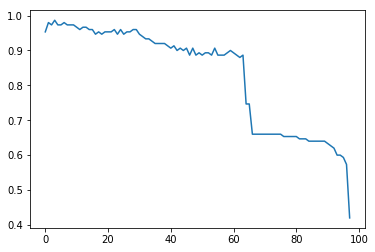

In [57]:
# Plot the scores
plt.plot(scores);

Zoom in to look at fit before first dive around 25:

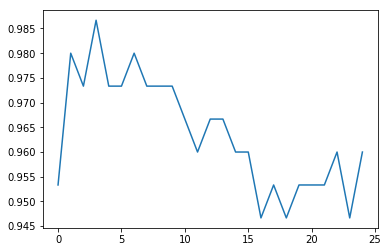

In [58]:
plt.plot(scores[:25]);

### Cross-Validation

In [59]:
kf = KFold(n_splits=5, random_state=1234, shuffle=False)
# for train, test in kf.split(irisdf):
#     print("%s %s" % (train, test))

In [60]:
features = irisdf[["petal length (cm)", "petal width (cm)"]]
features.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

In [61]:
outcome = irisdf["target"]
outcome.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [62]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [63]:
mse_values = []
scores = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(features):
    k_neighbors = knn.fit(features.iloc[train_index], 
                                             outcome.iloc[train_index])
   
    scores.append(k_neighbors.score(features.iloc[test_index], outcome.iloc[test_index]))
    n+=1
    print('Model', n)
    print('Accuracy:', scores[n-1])


print("\n~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Accuracy for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Accuracy: 1.0
Model 2
Accuracy: 1.0
Model 3
Accuracy: 0.9
Model 4
Accuracy: 0.9333333333333333
Model 5
Accuracy: 0.8333333333333334

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Accuracy for all folds: 0.9333333333333332
